# Introduction: stocks as geometric Brownian motion
A basic way of modeling stocks is via geometric Brownian motions (GBM). Before diving into that, let's fix notation for the $n$-step symmetric random walk: Consider $M_n = Z_1 + \dots + Z_n$ where $Z_i$ are all independent distributions that are +1 with probability $1/2$ and -1 with probability $1/2$.  Note that the expectation of each $Z_i$ is 0 and the variance is $1^2 1/2 + (-1)^2 1/2 = 1$. Hence, by the central limit theorem 
$$
\lim_{n \to \infty} \frac{M_n}{\sqrt{n}} = N(0,1).
$$
Note that $\lim_{n \to \infty} M_n/n^\alpha = 0$ for any $\alpha > 1/2$.

### Risk-free geometric Brownian motion stock model
Let $t > 0$ denote a point in the future measured in years. Let $S_t$ be the distribution of a stock price at time $t$.
Assume that there is $\sigma$ such that for all $n \in \mathbb{N}$ we can segment the interval $[0,t]$ into $n$ segments of equal size such that 
$$
\frac{S_t}{S_0} = \frac{S_{t/n}}{S_0} \cdots \frac{S_{nt/n}}{S_{(n-1)t/n}} = \prod_{i=1}^n \frac{S_{it/n}}{S_{(i-1)t/n}}$$
and each
$$\frac{S_{it/n}}{S_{(i-1)t/n}} = \begin{cases} 1+\sigma\sqrt{dt}, \quad p=\frac{1}{2} \\ 1-\sigma\sqrt{dt}, \quad p=\frac{1}{2} \end{cases},
$$
where $dt = \frac{t}{n}$ and each return $\frac{S_{it/n}}{S_{(i-1)t/n}}$ is independent of one another.

We want to understand 
$$
\lim_{n \to \infty} \prod_{i=1}^n \frac{S_{it/n}}{S_{(i-1)t/n}}.
$$

As always, we take the natural log and look at
$$
\ln \prod_{i=1}^n \frac{S_{it/n}}{S_{(i-1)t/n}} = \sum_{i=1}^n \ln\frac{S_{it/n}}{S_{(i-1)t/n}}.
$$

Let $H(n)$ be the number of upward movements in the returns ("head"), and $T(n)$ be the number of downward movements in the returns ("tail").  Hence
$$
\sum_{i=1}^n \ln\frac{S_{it/n}}{S_{(i-1)t/n}} = H(n) \ln(1+\sigma\sqrt{dt}) + T(n)\ln(1-\sigma\sqrt{dt}).
$$

Note that
- $H(n) + T(n) = n$, and 
- $H(n) - T(n) = M_n$, the $n$-step symmetric random walk,
so that $H(n) = \frac{n+M_n}{2}$ and $T(n) = \frac{n - M_n}{2}$.  Therefore
$$
\sum_{i=1}^n \ln\frac{S_{it/n}}{S_{(i-1)t/n}} = \frac{n+M_n}{2} \ln(1+\sigma\sqrt{dt}) + \frac{n-M_n}{2} \ln(1-\sigma\sqrt{dt}).
$$

Then
$$
\begin{split}
\sum_{i=1}^n \ln\frac{S_{it/n}}{S_{(i-1)t/n}} &= \frac{n+M_n}{2} \left(\sigma\sqrt{dt} - \frac{\sigma^2 dt}{2} + O(dt^{3/2}) \right) \\
&\qquad+ \frac{n-M_n}{2} \left( -\sigma\sqrt{dt} - \frac{\sigma^2 dt}{2} + O(dt^{3/2}) \right)
\end{split}.
$$

Recalling that $n dt = t$, by multiplying things out this simplifies to
$$
= \frac{-\sigma^2}{2}t + \sigma \sqrt{dt} M_n + (n + M_n) O(dt^{3/2}),
$$
where $(n + M_n) O(dt^{3/2}) \to 0$ as $n \to \infty$.  Moreover
$$
\sigma\sqrt{dt} M_n = \sigma \sqrt{t} \frac{M_n}{\sqrt{n}} \to \sigma\sqrt{t} N(0,1)
$$
as $n \to \infty$, so we conclude that 
$$
\ln\frac{S_t}{S_0} = -\frac{\sigma^2}{2}t + \sigma \sqrt{t} N(0,1),
$$
that is
$$
S_t = S_0 e^{-\frac{\sigma^2}{2}t + \sigma\sqrt{t} N(0,1)},
$$
i.e. the log-returns are some normal distribution, and the return is a log-normal distribution.  It is *risk-free* with 0% interest because
$$
E[S_t] = S_0 E[e^{-\frac{\sigma^2}{2}t + \sigma\sqrt{t} N(0,1)}] = S_0.
$$

If we want to incorporate interest, let $r > 0$ represent the risk-free interest rate.  This means: if $t_1 < t_2$, then the value of $x$ dollars at time $t_1$ forwarded at time $t_2$ is $x e^{r(t_2 - t_1)}$.

Saying that a stock is risk-free means that the expected return should be the same as the risk-free asset:
$$
S_t = S_0 e^{\left(r-\frac{\sigma^2}{2}\right) t + \sigma\sqrt{t} N(0,1)}.
$$
If we also want to model a log-drift, let $\mu \in \mathbb{R}$ and consider the new model
$$
S_t = S_0 e^{\left(\mu + r-\frac{\sigma^2}{2}\right) t + \sigma\sqrt{t} N(0,1)}.
$$

### Implementation
The following code implements the GBM model for stock paths.  The same code is available in `utils.py`, and it is sourced from there for cross-notebook consistency.

```python
def GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps):
    """Simulates stock paths as geometric Brownian Motions
    Inputs:
    S0 (float): Underlying stock price at time 0
    sigma (float): Yearly volatility
    t (float): Time to expiration (years)
    r (float): Risk-free interest rate
    mu (float): Drift of log-returns
    n_sims (int): Number of simulated paths
    n_steps (int): Number of steps in each simulated path, each step interval has length t/n_steps
    
    Return (np.array): Array of stock paths
    """
    
    noise = np.random.normal(loc = 0, scale = 1, size = (n_sims, n_steps))
    log_returns = (mu+r-sigma**2*(0.5))*t/n_steps + sigma*np.sqrt(t/n_steps)*noise
    paths_with_start = np.insert(S0*np.exp(np.cumsum(log_returns, axis = 1)), 0, S0, axis = 1)

    return paths_with_start
```

Below we demonstrate the function by plotting 10 paths with 500 steps on a time-horizon of 2 years.  We take the interest rate to be $r = 3.5\%$, the volatility to be $\sigma = 0.45$, and the initial asset value to be $100 USD.

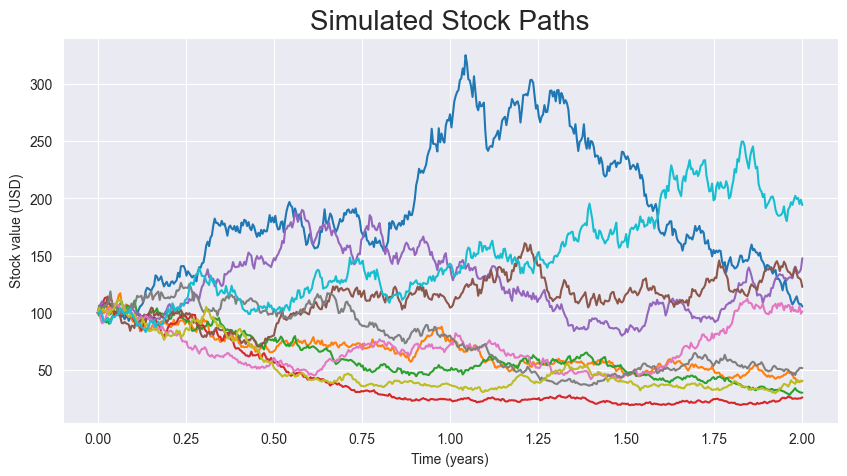

In [ ]:
from utils import GBM_paths

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

S0 = 100
sigma = 0.45
t = 2
r = 0.035
mu = 0

n_sims = 10
n_steps = 500

time = np.linspace(0, t, n_steps + 1)

stock_paths = GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps)

plt.figure(figsize=(10, 5))
for path in stock_paths:
    plt.plot(time, path)


plt.xlabel("Time (years)")
plt.ylabel("Stock value (USD)")
plt.title("Simulated stock paths", size=20)

plt.show()